## Customer Churn Prediction 

In [1]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.drop(columns=['RowNumber','CustomerId',	'Surname'],inplace=True)

In [17]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [20]:
df=pd.get_dummies(df,columns=['Geography',	'Gender'],drop_first=True)

In [21]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [26]:
x= df.drop(columns=['Exited'])
y= df['Exited']

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.shape

(8000, 11)

In [31]:
x_test.shape

(2000, 11)

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
# y_train

In [33]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [36]:
x_train_scaled
x_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

### Tensorflow + Keras 

In [42]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


Keras mai 2 type ka model banaskte  hai 
1. Sequential & 2. Non sequential   
Sequential Easy hai

In [87]:
model = Sequential() 

 1 input layer   
 1 hidden layer   - 3 perceptron    
 1 output layer 

In [88]:
model.add(Dense(11,activation='relu',input_dim=11)) # hidden layer 
model.add(Dense(11,activation='relu')) # hidden layer 
model.add(Dense(11,activation='relu')) # hidden layer 
model.add(Dense(1,activation="sigmoid"))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Compilation Stage 

Optimizer , Loss Function 


In [90]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

passes - Epochs 

This is the stage where Neural Network is getting trained. 

In [91]:
history =model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

# validation split mtlb if 8k customer hai so usme bhi 20% customer ko cutt krrha hoo 
# so mera model jo hai hai 8k - 20% pe run krega 
# validate krneka acha technique hai 

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5551 - accuracy: 0.7578 - val_loss: 0.4734 - val_accuracy: 0.8062
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.8050 - val_loss: 0.4341 - val_accuracy: 0.8169
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4331 - accuracy: 0.8133 - val_loss: 0.4182 - val_accuracy: 0.8206
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8245 - val_loss: 0.4097 - val_accuracy: 0.8306
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8291 - val_loss: 0.4038 - val_accuracy: 0.8306
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8294 - val_loss: 0.3958 - val_accuracy: 0.8356
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3864 - accuracy: 0.8355 - val_loss: 0.3943 - val_accuracy: 0.8344

In [92]:
import matplotlib.pyplot as plt 

In [94]:
history.history

{'loss': [0.5550879836082458,
  0.4584520757198334,
  0.43308907747268677,
  0.41669073700904846,
  0.4051516652107239,
  0.3952694833278656,
  0.38641300797462463,
  0.37880390882492065,
  0.371743768453598,
  0.3650634288787842,
  0.35688212513923645,
  0.35049283504486084,
  0.34536734223365784,
  0.34187912940979004,
  0.33931809663772583,
  0.3386668860912323,
  0.3371964693069458,
  0.33612555265426636,
  0.33553820848464966,
  0.33379924297332764,
  0.3327600955963135,
  0.33243685960769653,
  0.33216556906700134,
  0.3316771984100342,
  0.33097678422927856,
  0.3306175470352173,
  0.33081966638565063,
  0.32894670963287354,
  0.3288179039955139,
  0.32847318053245544,
  0.32764533162117004,
  0.3283282220363617,
  0.3271513283252716,
  0.32744085788726807,
  0.32703831791877747,
  0.32654526829719543,
  0.32638245820999146,
  0.3255995810031891,
  0.3268091678619385,
  0.32521578669548035,
  0.3248967230319977,
  0.32427406311035156,
  0.32442355155944824,
  0.3237656056880951,

## 1 se lekr  30 epochs tak kaise loss kamm hua 

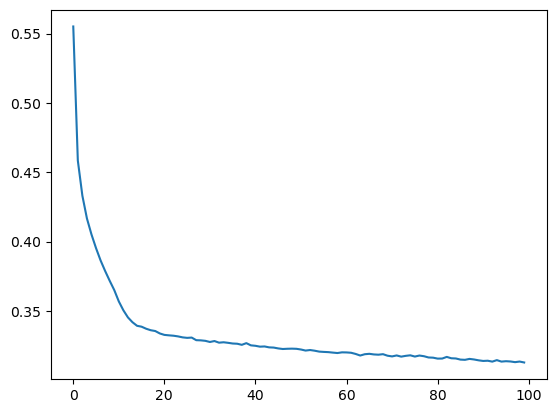

In [95]:
plt.plot(history.history['loss'])

#### 1 se lekr  30 epochs tak kaise validation loss kamm hua 
gap is telling us ki kitna overfitting hua

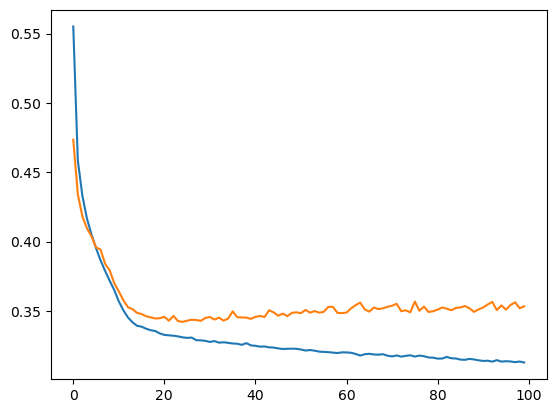

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

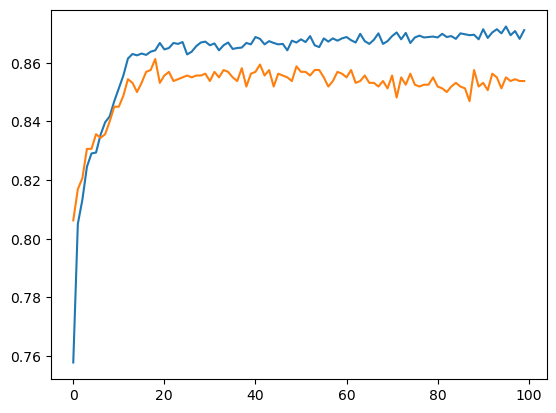

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Gaps bht zyaada hai mtlb overfitting so yaha  
hum concept use krte Regularization & Dropout ka

In [98]:
model.layers[0].get_weights()

[array([[ 1.98281184e-01, -3.32863659e-01, -8.70987624e-02,
         -7.46677145e-02,  6.46553859e-02, -2.44252756e-02,
         -4.29158628e-01, -1.81741178e-01,  2.24006549e-01,
          5.60173579e-02,  8.40170830e-02],
        [ 4.70778197e-02,  2.90234953e-01,  1.06806040e+00,
         -2.83424318e-01, -6.29422516e-02, -9.85970274e-02,
         -5.49791396e-01,  7.10034251e-01,  3.02108437e-01,
          4.56002921e-01,  8.70010734e-01],
        [-4.74174730e-02, -6.52412236e-01,  9.94856507e-02,
         -7.76447579e-02,  1.25452513e-02, -9.04420689e-02,
         -4.08551306e-01, -1.05389915e-01,  3.71745378e-01,
         -7.62003213e-02,  2.14102194e-01],
        [ 2.33088195e-01, -2.55943954e-01,  1.10988598e-03,
         -3.50185670e-02, -5.70718884e-01, -3.75104547e-01,
         -6.88395426e-02,  1.33492842e-01,  1.26980126e-01,
          6.42602667e-02, -4.55996454e-01],
        [-5.29544652e-01, -1.17151760e-01, -2.26743937e-01,
         -4.71386045e-01,  1.93625148e-02, -

In [99]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 4ms/step


In [100]:
y_pred=np.where(y_log>0.5,1,0)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

### Accuracy Increment krneko experimentation 

1.number of epochs badaskte hai 

2. hidden layers ka activation function Relu hai tou result acha dega

3. Layers jo hai specially hiden layer uske number of nodes badado 

4. Number of Layers badado 
bhaut zyaada layers add krnese overfitting hone lagta hai so dekho experiment krke ki kaunsa better hai 
